In [45]:
from homomesy import *
from homomesy.homomesy import the_number_of_fixed_points
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from typing import Iterable
import ipywidgets as widgets


In [5]:
from math import comb

def number_of_fixed_points_permutations_helper(n, k):
    return comb(n, k) * (n - 1) ** (n - k)

def number_of_fixed_points_permutations(n):
    return [number_of_fixed_points_permutations_helper(n, k) for k in range(n + 1)]

def number_of_fixed_points_parking_functions(n):
    r = [0] * (n + 1)
    for p in all_collections["Parking functions"].collection(n):
        r[the_number_of_fixed_points(p)] += 1

    return r


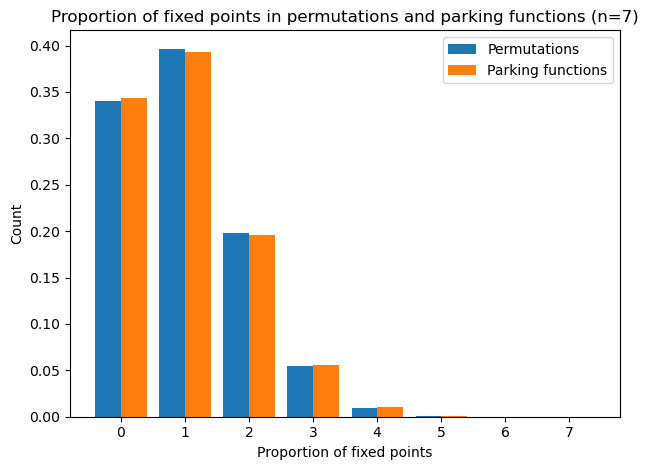

In [6]:
n = 7

width = 0.4 

x = list(range(n + 1))  

perm_counts = np.array(number_of_fixed_points_permutations(n), dtype=float)
park_counts = np.array(number_of_fixed_points_parking_functions(n), dtype=float)
perm_counts /= np.sum(perm_counts)
park_counts /= np.sum(park_counts)


x_perm = [xi - width / 2 for xi in x]
x_park = [xi + width / 2 for xi in x]


plt.bar(x_perm, perm_counts, width=width, label="Permutations")
plt.bar(x_park, park_counts, width=width, label="Parking functions")


plt.xlabel("Proportion of fixed points")
plt.ylabel("Count")
plt.title(f"Proportion of fixed points in permutations and parking functions (n={n})")
plt.xticks(x)  
plt.legend()
plt.tight_layout()
plt.show()

In [55]:


def get_statistic_proportions(statistic, S):
    r = {}
    total = float(len(S))
    for s in S:
        v = statistic(s)
        if v not in r:
            r[v] = 1
        else:
            r[v] += 1
    for k in r:
        r[k] /= total
    return r

def plot_statistic_proportions(statistic, sets:list[CollectionWithMapsAndStats], n, width=0.8, save=False):
    statistic_proportions = [get_statistic_proportions(statistic, S.collection(n)) for S in sets]
    total_min = float("inf")
    total_max = float("-inf")
    for i, sp in enumerate(statistic_proportions):
        v_range = np.arange(min(sp.keys()), max(sp.keys()) + 1)
        xs = v_range - width / 2 + width / len(sets) / 2  + i * width / len(sets)
        ys = [sp[k] if k in sp else 0 for k in v_range]
     
        plt.bar(xs, ys, width=width / len(sets), label=sets[i].name)
        total_min = min(total_min, v_range.min())
        total_max = max(total_max, v_range.max())
    
    plt.xlabel("Statistic value")
    plt.ylabel("Proportion")
    if len(sets) == 1:
        title = f"Proportions of {statistic.__name__}\nin {sets[0].name} (n={n})"
    else:
        title = f"Proportions of {statistic.__name__}\nin {', '.join([s.name for s in sets[:-1]])} and {sets[-1].name} (n={n})"
    plt.title(title)
    plt.xticks(np.arange(total_min, total_max + 1, 1))
    plt.legend()
    if save:
        plt.savefig(f"out/{title.replace(' ', '_').replace('\n', '_')}.svg")
    plt.show()

In [ ]:
set_selector = widgets.SelectMultiple(
    options=[(c.name, c) for c in all_collections.values()],
    description='Collections',
)
stats = widgets.Dropdown(
    options=general_statistics,
    description='Statistic',
    value=general_statistics[0] 
)
n_silder = widgets.IntSlider(
    value=5,
    min=1,
    max=7,
    step=1,
    description='n',
)
save_checkbox = widgets.Checkbox(
    value=False,
    description='Save plot',
)

def plot_statistic_proportions_gui(sets, statistic, n, save):
    plot_statistic_proportions(statistic, sets, n, save=save)
    plt.show()


interact_manual(plot_statistic_proportions_gui, 
                sets=set_selector, 
                statistic=stats, 
                n=n_silder,
                save=save_checkbox
                )

interactive(children=(SelectMultiple(description='Collections', options=(('Permutations', CollectionWithMapsAn…

<function __main__.plot_statistic_proportions_gui(sets, statistic, n, save)>

In [ ]:
def plot_multiple(idx, sub_plot_count_x, sub_plot_count_y, title = None, n=7, width=0.4, show_sub_titles=True, save=False, figsize=None, shorten_subtitles=True):
    if not isinstance(idx, (list, tuple)):
        idx = [idx]
    fig, axs = plt.subplots(sub_plot_count_y, sub_plot_count_x, figsize=figsize)
    if len(idx) == 1:
        axs = [axs]
    if len(np.shape(axs)) == 1:
        axs = np.array([axs])
    axs = axs.flatten()
    relevant_stats = [stat for _idx, stat in enumerate(general_statistics) if _idx in idx]
    for i, stat in enumerate(relevant_stats):
        perm_stat_counts = []
        park_stat_counts = []
        for p in Permutations(n):
            v = stat(IntegerListWrapper(p))
            if len(perm_stat_counts) <= v:
                perm_stat_counts.extend([0] * (v - len(perm_stat_counts) + 1))
            perm_stat_counts[v] += 1
        for p in ParkingFunctions(n):
            v = stat(IntegerListWrapper(p))
            if len(park_stat_counts) <= v:
                park_stat_counts.extend([0] * (v - len(park_stat_counts) + 1))
            park_stat_counts[v] += 1
        perm_stat_counts = np.array(perm_stat_counts, dtype=float)
        park_stat_counts = np.array(park_stat_counts, dtype=float)
        perm_stat_counts /= np.sum(perm_stat_counts)
        park_stat_counts /= np.sum(park_stat_counts)

        x_perm = [xi - width / 2 for xi in range(len(perm_stat_counts))]
        x_park = [xi + width / 2 for xi in range(len(park_stat_counts))]

        min_x = min([i for i,v in enumerate(perm_stat_counts) if v > 0] + [i for i,v in enumerate(park_stat_counts) if v > 0])
        max_x = max([i for i,v in enumerate(perm_stat_counts) if v > 0] + [i for i,v in enumerate(park_stat_counts) if v > 0])

        x_perm = [xi for i, xi in enumerate(x_perm) if min_x <= i <= max_x]
        x_park = [xi for i, xi in enumerate(x_park) if min_x <= i <= max_x]
        
        perm_stat_counts = perm_stat_counts[min_x:max_x + 1]
        park_stat_counts = park_stat_counts[min_x:max_x + 1]

        axs[i].bar(x_perm, perm_stat_counts, width=width, label="Permutations")
        axs[i].bar(x_park, park_stat_counts, width=width, label="Parking functions")
        axs[i].set_xlabel(stat.__name__)
        axs[i].set_ylabel("Proportion")
        if show_sub_titles:
            if shorten_subtitles:
                axs[i].set_title(f"Distribution of {stat.__name__[:stat.__name__.index(':')]} in permutations and parking functions")
            else:
                axs[i].set_title(f"Distribution of {stat.__name__} in permutations and parking functions")

        axs[i].legend()
    if title is not None:
        fig.suptitle(title + f" (n={n})")
    plt.tight_layout()
    if save:
        plt.savefig(f"out/stat_{'-'.join(map(str, idx))}_n_{n}.svg")
    plt.show()

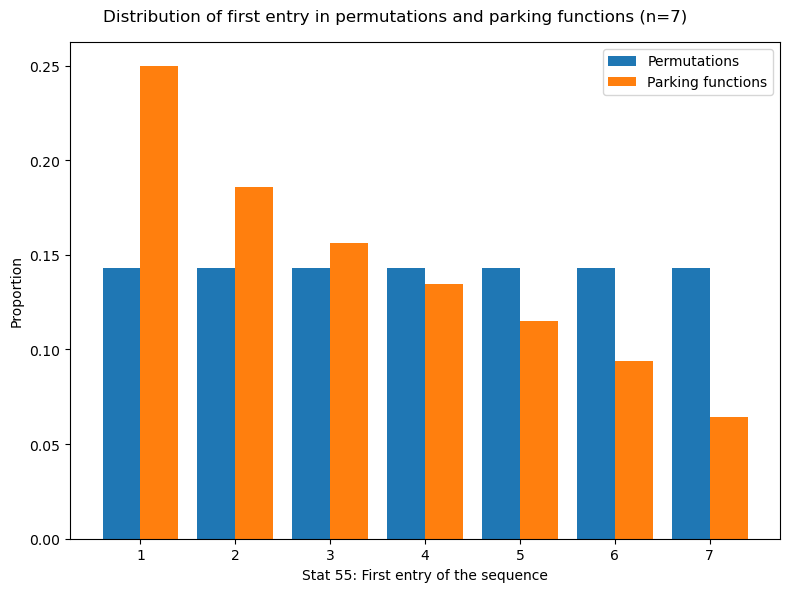

In [59]:
plot_multiple(0, 1, 1, "Distribution of first entry in permutations and parking functions", save=True, show_sub_titles=False, figsize=(8, 6))

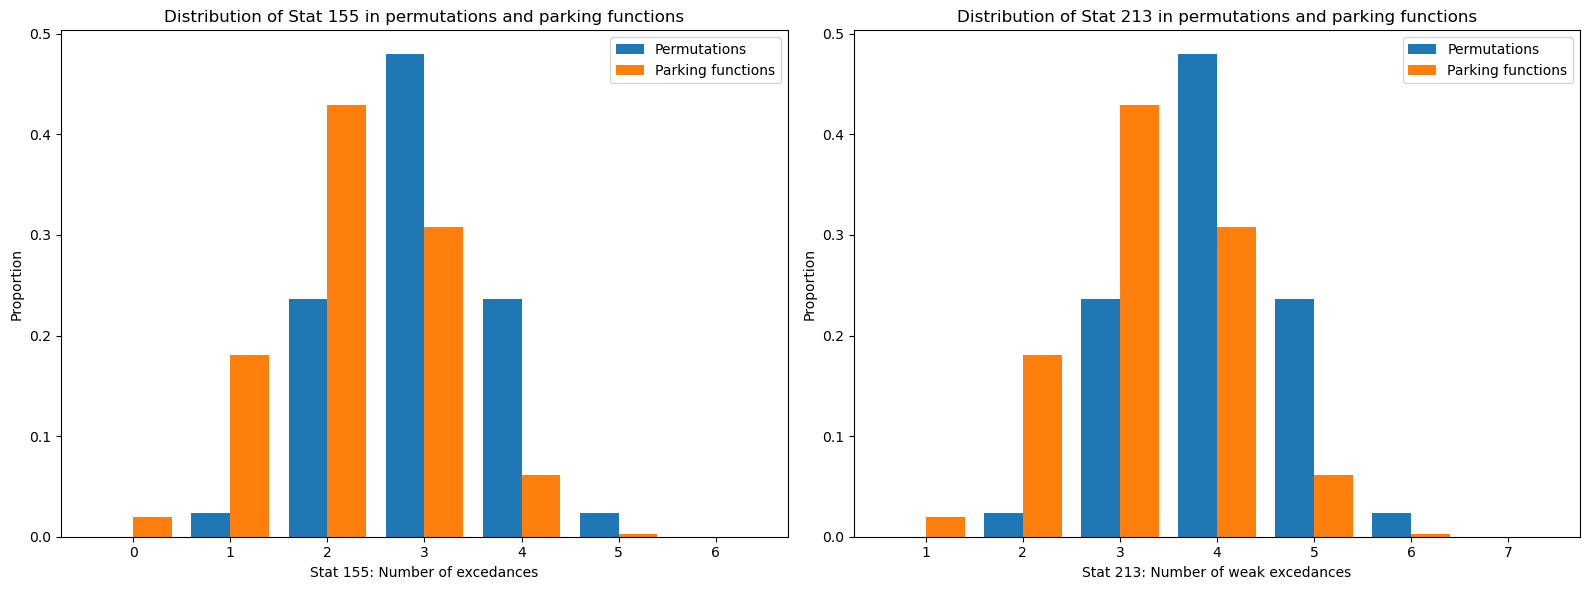

In [ ]:
plot_multiple((2,3), 2, 1, figsize=(16, 6), save=True)

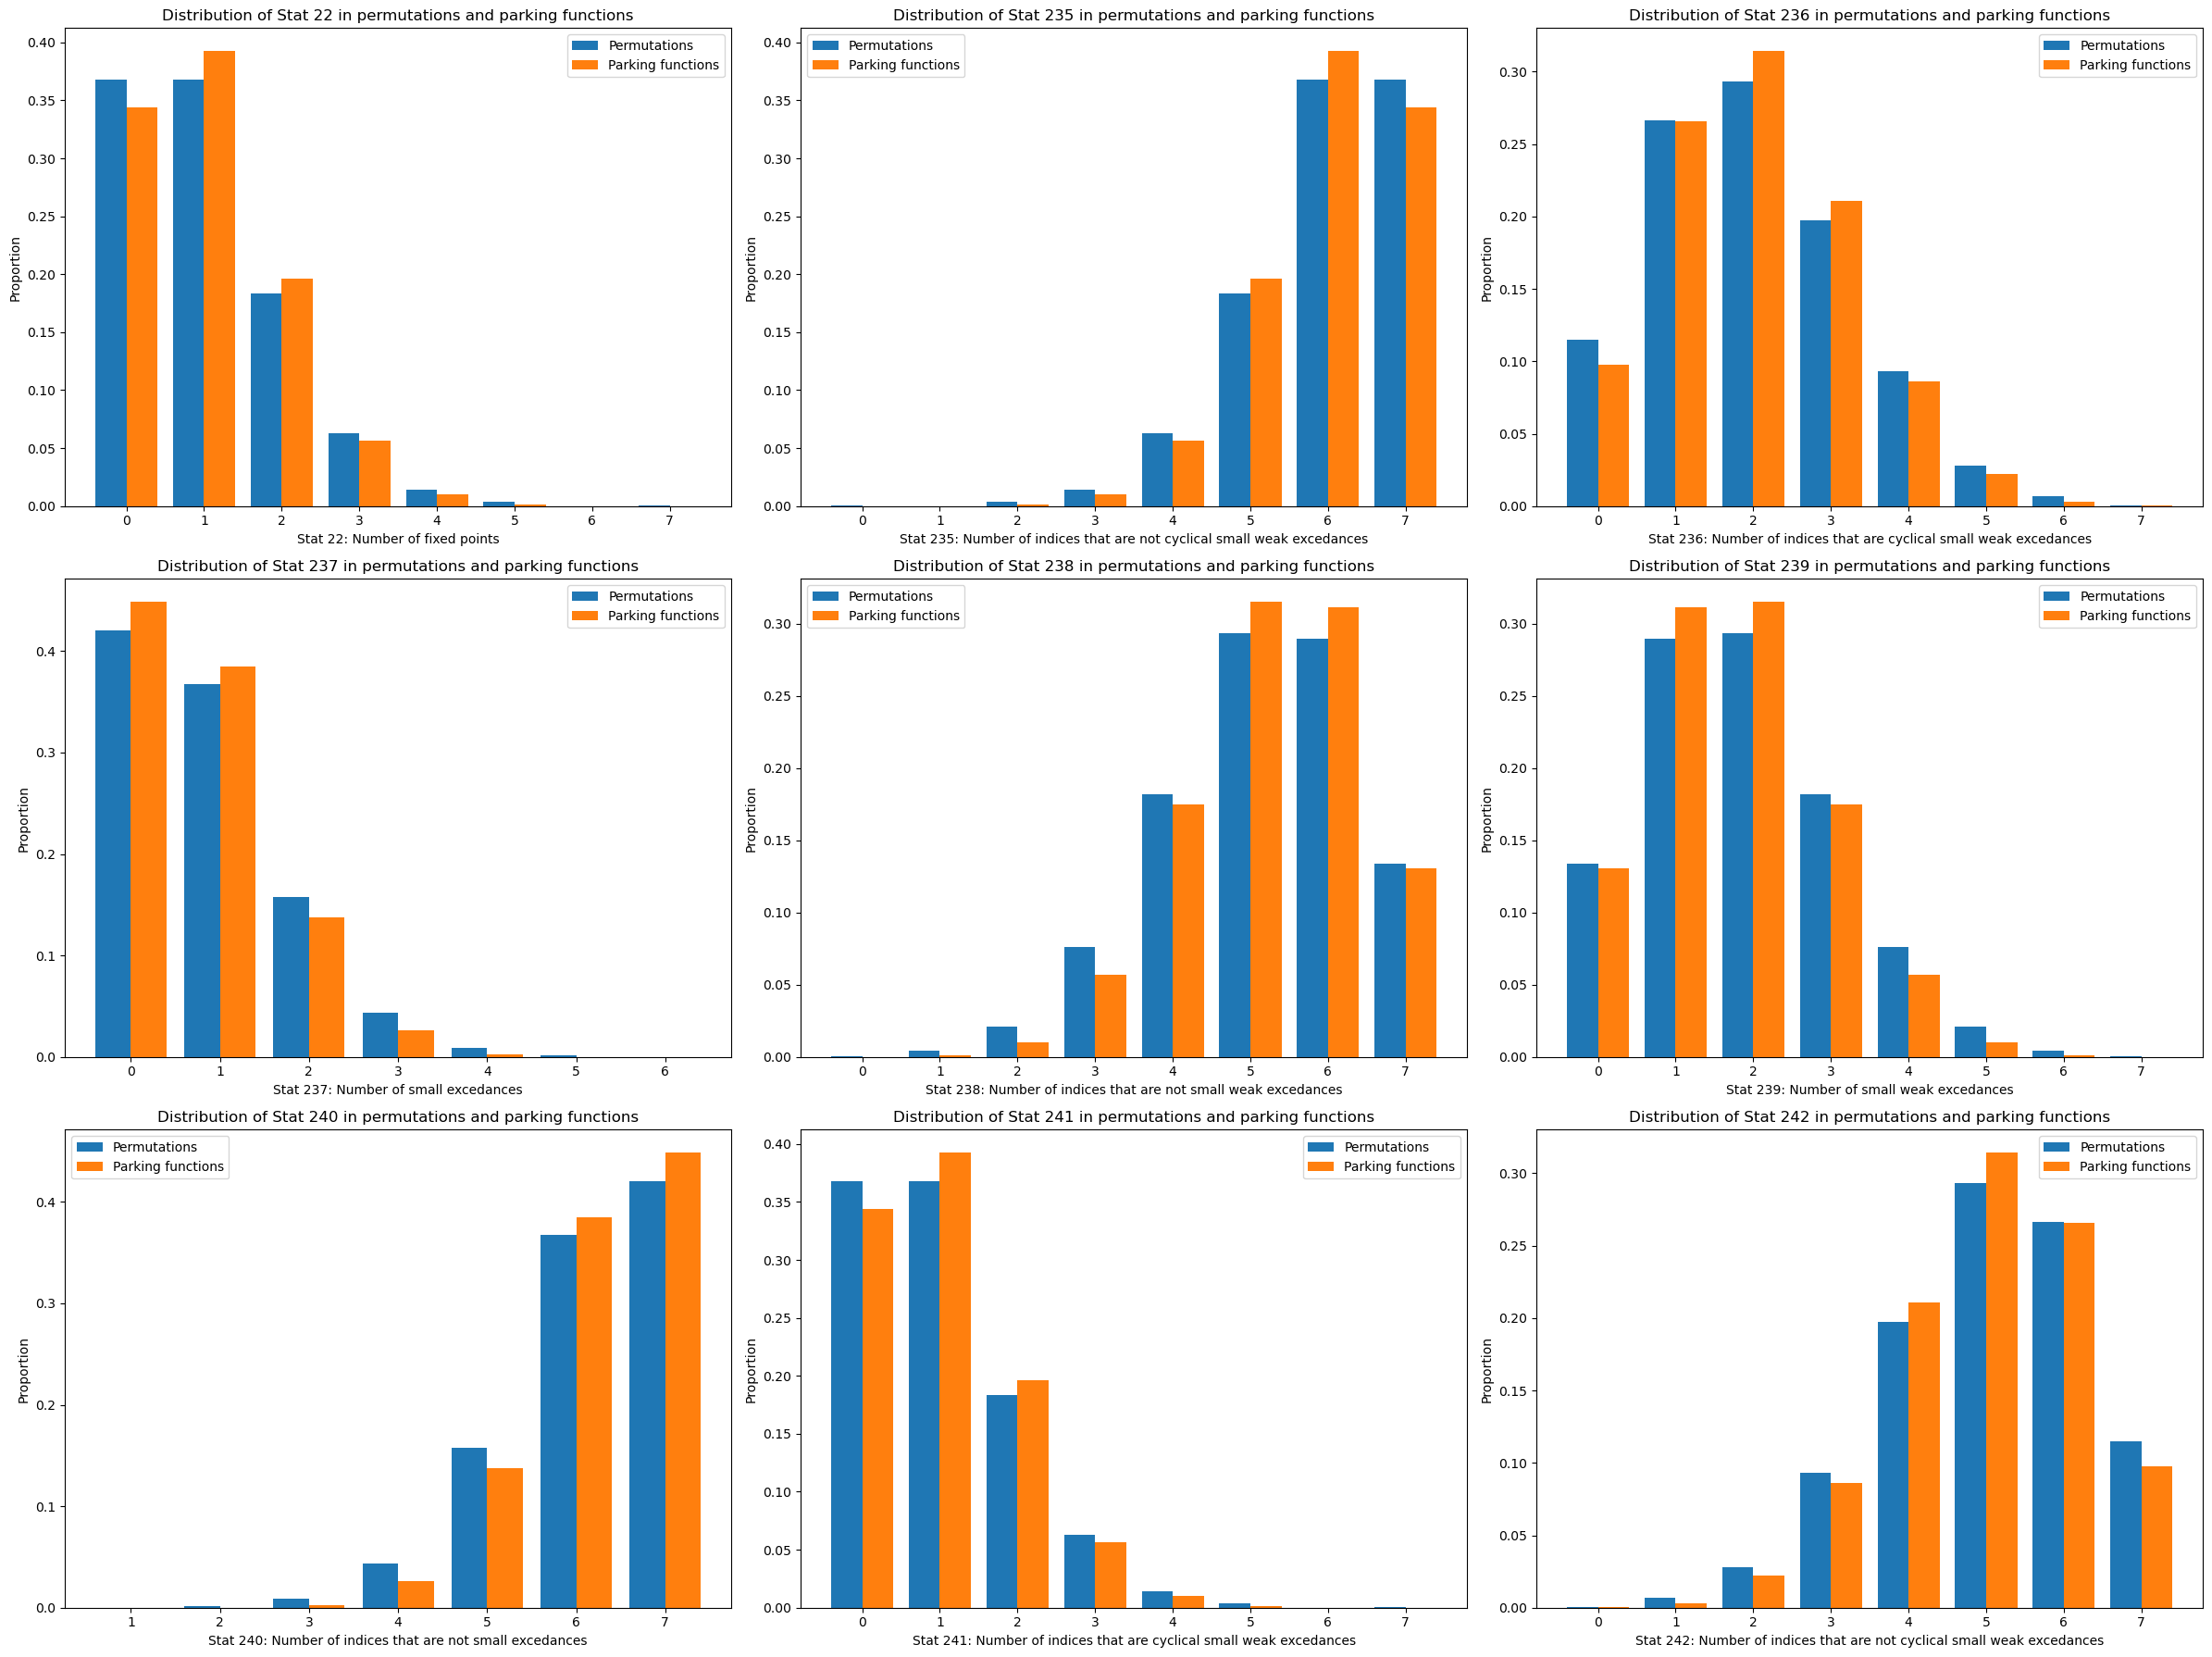

In [ ]:

plot_multiple((1,4,5,6,7,8,9,10,11), 3, 3, figsize=(24, 18), save=True)